In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scienceplots
plt.style.use(["science", "no-latex"])

# Ecotox dataset

In [ ]:
# ecotox = pd.read_excel(r'data\\Data prepocess\\envirotox_20240201154635.xlsx')
ecotox = pd.read_excel(os.path.join('..', 'data', 'envirotox_20240201154635.xlsx'))
ecotox = ecotox[(ecotox['Test statistic'] == 'EC50') & (ecotox['Duration (days)'] == 4)]

<Axes: xlabel='Trophic Level', ylabel='Count'>

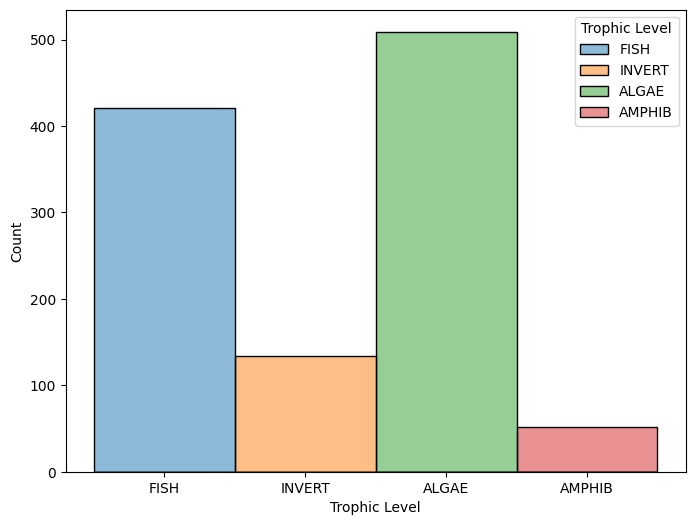

In [ ]:

plt.figure(figsize=(8,6))
sns.histplot(data=ecotox.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='Trophic Level')

In [ ]:
ecotox_classification = ecotox.copy()
ecotox_regression = ecotox[ecotox['Effect value'] <= 200]

<Axes: xlabel='Trophic Level', ylabel='Count'>

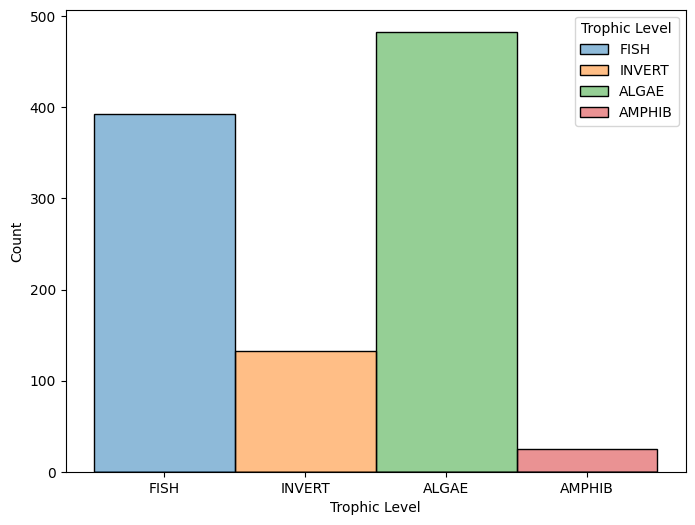

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=ecotox_regression.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='Trophic Level')

In [ ]:
flag = []
for i,row in ecotox.iterrows():
    if row['Effect value'] >= 100:
        flag.append('no toxic')
    else:
        flag.append('is toxic') 
ecotox.insert(0, 'flag', flag)

<Axes: xlabel='Trophic Level', ylabel='Count'>

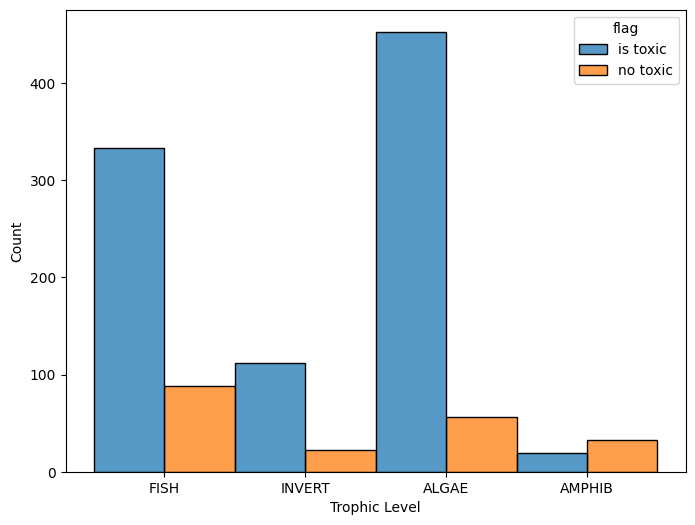

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=ecotox.drop_duplicates(subset='Chemical name'), x='Trophic Level', hue='flag', multiple="dodge")

# Flags dataset

In [ ]:
# flags = pd.read_csv(r'data\\EC50_flags.csv')
flags = pd.read_csv(os.path.join('..', 'data', 'EC50_flags_short_names.csv'))
new_column_list = [i for i in flags.columns if '─' in i]

<Axes: >

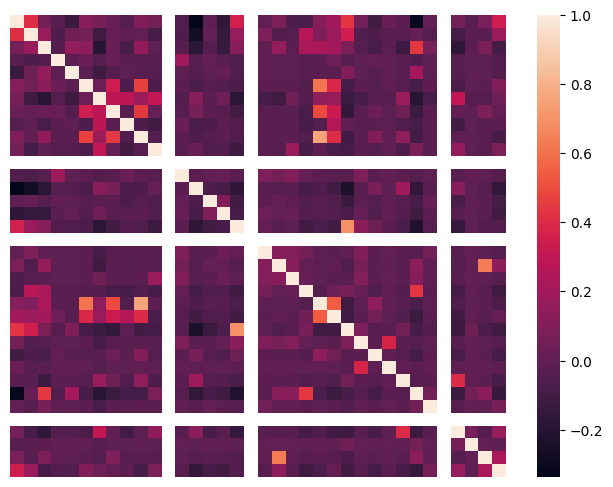

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(flags[new_column_list].corr(),  xticklabels=False, yticklabels=False)

In [ ]:
import numpy as np
flags = pd.read_csv(os.path.join('..', 'data', 'EC50_flags_short_names.csv'))
column_list = [i for i in flags.columns if '─' in i]

corr_matrix = flags[column_list].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

flags.drop(to_drop, axis=1, inplace=True)
column_list = [i for i in flags.columns if '─' in i]
drop_list = []
for i in column_list:
    if flags[i].sum() == 0:
        drop_list.append(i)

flags.drop(drop_list, axis=1, inplace=True)

<Axes: >

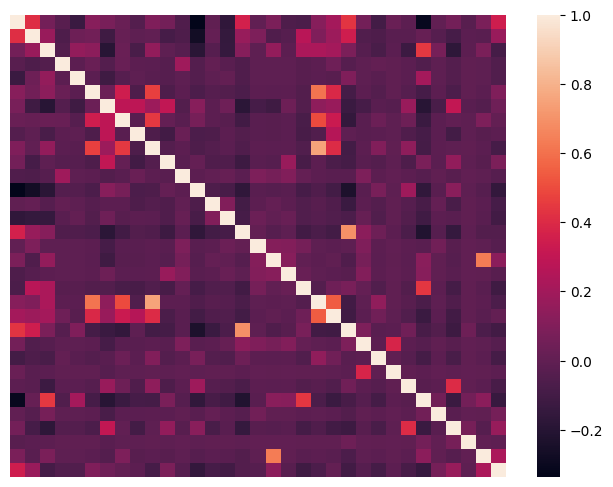

In [ ]:
plt.figure(figsize=(8,6))
new_column_list = [i for i in flags.columns if '─' in i]
sns.heatmap(flags[new_column_list].corr(), xticklabels=False, yticklabels=False)

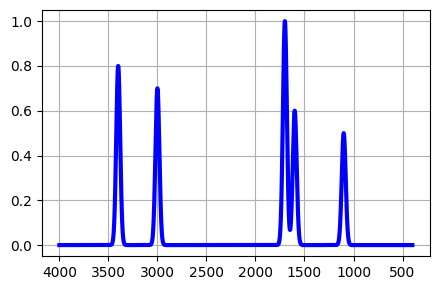

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for an IR spectrum
wavenumbers = np.array([3400, 3000, 1700, 1600, 1100])
intensities = np.array([0.8, 0.7, 1.0, 0.6, 0.5])

# Generating a more realistic spectrum by adding peaks
def generate_ir_spectrum(wavenumbers, intensities):
    spectrum_x = np.linspace(4000, 400, 3600)
    spectrum_y = np.zeros_like(spectrum_x)
    
    for peak, intensity in zip(wavenumbers, intensities):
        spectrum_y += intensity * np.exp(-((spectrum_x - peak) ** 2) / (2 * 20 ** 2))
    
    return spectrum_x, spectrum_y

spectrum_x, spectrum_y = generate_ir_spectrum(wavenumbers, intensities)

# Plotting the IR spectrum
plt.figure(figsize=(4.5, 3))
plt.plot(spectrum_x, spectrum_y, label="IR Spectrum", linewidth=3, color='blue')
# plt.xlabel("Wavenumber (cm⁻¹)")
# plt.ylabel("Absorbance")
# plt.title("IR Spectrum")
plt.gca().invert_xaxis()  # Invert x-axis to match IR spectrum convention
# plt.legend()
plt.grid(True)
plt.tight_layout()

# Highlighting the peaks
# for peak, intensity in zip(wavenumbers, intensities):
#     plt.plot([peak, peak], [0, intensity], 'r--')
#     plt.text(peak, intensity + 0.02, f"{peak} cm⁻¹", horizontalalignment='center')

# Show plot
plt.savefig('../plots/ir_example.png', dpi=300)
plt.show()


In [4]:
import pandas as pd
df = pd.read_csv('../data/nist_ir_spectra_list_with_bonds.csv')

In [5]:
df

,CAS,Unnamed: 0,Name,Formula,Mw,Elements,InChi,SMILES,C─H alkyl methyl 1260 strong,C─H alkyl methyl 1380 weak,...,C─X chloroalkanes any 540–760 weak to medium,C─X bromoalkanes any 500–600 medium to strong,C─X iodoalkanes any 500 medium to strong,N─O nitro compounds aliphatic 1540 stronger,N─O nitro compounds aliphatic 1380 weaker,N─O nitro compounds aromatic 1520 lower if conjugated,N─O nitro compounds aromatic 1350 lower if conjugated,P─C Organophosphorus compound aromatic 1440-1460 medium,P─O phosphorus oxide bonded 1195-1250 strong,P─O phosphorus oxide free 1250-1300 strong
0,100-00-5,0,"Benzene, 1-chloro-4-nitro-",C6H4ClNO2,156.993056,"['C', 'H', 'Cl', 'N', 'O']",InChI=1/C6H4ClNO2/c7-5-1-3-6(4-2-5)8(9)10/h1-4H,[O-][N+](=O)c1ccc(Cl)cc1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,100-01-6,1,p-Nitroaniline,C6H6N2O2,138.042927,"['C', 'H', 'N', 'O']",InChI=1/C6H6N2O2/c7-5-1-3-6(4-2-5)8(9)10/h1-4H...,Nc1ccc(cc1)[N+]([O-])=O,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,100-02-7,2,"Phenol, 4-nitro-",C6H5NO3,139.026943,"['C', 'H', 'N', 'O']","InChI=1/C6H5NO3/c8-6-3-1-5(2-4-6)7(9)10/h1-4,8H",Oc1ccc(cc1)[N+]([O-])=O,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1000-49-3,5,N-butyltrimethylsilane,C7H18Si,130.117777,"['C', 'H', 'Si']","InChI=1/C7H18Si/c1-5-6-7-8(2,3)4/h5-7H2,1-4H3",CCCC[Si](C)(C)C,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000-50-6,6,N-Butyldimethylchlorosilane,C6H15ClSi,150.063155,"['C', 'H', 'Cl', 'Si']","InChI=1/C6H15ClSi/c1-4-5-6-8(2,3)7/h4-6H2,1-3H3",CCCC[Si](C)(C)Cl,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12228,99-97-8,44445,"Benzenamine, N,N,4-trimethyl-",C9H13N,135.104799,"['C', 'H', 'N']","InChI=1/C9H13N/c1-8-4-6-9(7-5-8)10(2)3/h4-7H,1...",CN(C)c1ccc(C)cc1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12229,999-78-0,44446,"2-Pentyne, 4,4-dimethyl-",C7H12,96.093900,"['C', 'H']","InChI=1/C7H12/c1-5-6-7(2,3)4/h1-4H3",CC#CC(C)(C)C,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12230,999-81-5,44448,"Ammonium chloride, 2-chloroethyltrimethyl-",C5H13ClN.Cl,157.042505,"['C', 'H', 'Cl', 'N', 'Cl']","InChI=1/C5H13ClN.ClH/c1-7(2,3)5-4-6;/h4-5H2,1-...",[Cl-].C[N+](C)(C)CCCl,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12231,99-99-0,44452,"Benzene, 1-methyl-4-nitro-",C7H7NO2,137.047678,"['C', 'H', 'N', 'O']","InChI=1/C7H7NO2/c1-6-2-4-7(5-3-6)8(9)10/h2-5H,1H3",Cc1ccc(cc1)[N+]([O-])=O,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
